In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px


In [2]:
df = pd.read_csv('/Users/dmitrybertnikov/Desktop/ds_learn/product_sales/raw/2019-Oct.csv')
df.head().T

,0,1,2,3,4
event_time,2019-10-01 00:00:00 UTC,2019-10-01 00:00:03 UTC,2019-10-01 00:00:07 UTC,2019-10-01 00:00:07 UTC,2019-10-01 00:00:15 UTC
event_type,cart,cart,cart,cart,cart
product_id,5773203,5773353,5881589,5723490,5881449
category_id,1487580005134238553,1487580005134238553,2151191071051219817,1487580005134238553,1487580013522845895
category_code,NaN,NaN,NaN,NaN,NaN
brand,runail,runail,lovely,runail,lovely
price,2.62,2.62,13.48,2.62,0.56
user_id,463240011,463240011,429681830,463240011,429681830
user_session,26dd6e6e-4dac-4778-8d2c-92e149dab885,26dd6e6e-4dac-4778-8d2c-92e149dab885,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,26dd6e6e-4dac-4778-8d2c-92e149dab885,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4102283 entries, 0 to 4102282
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 281.7+ MB


In [4]:
print(df.isnull().sum())
df['category_code'].fillna('unknown', inplace=True)
df['brand'].fillna('unknown', inplace=True)
df.dropna(subset=['user_session'], inplace=True)

df['event_time'] = pd.to_datetime(df['event_time'])

# df.columns = df.columns.str.strip()
# df['event_type'] = df['event_time'].str.strip()
# df['category_code'] = df['category_code'].str.strip()
# df['brand'] = df['brand'].str.strip()
df.info()
df.head()


event_time             0
event_type             0
product_id             0
category_id            0
category_code    4034806
brand            1659261
price                  0
user_id                0
user_session         637
dtype: int64


/var/folders/r4/7c89w02s21378007ly_nbnkw0000gn/T/ipykernel_1252/3157462469.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['category_code'].fillna('unknown', inplace=True)
/var/folders/r4/7c89w02s21378007ly_nbnkw0000gn/T/ipykernel_1252/3157462469.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

<class 'pandas.core.frame.DataFrame'>
Index: 4101646 entries, 0 to 4102282
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 312.9+ MB


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,unknown,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,unknown,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,unknown,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07+00:00,cart,5723490,1487580005134238553,unknown,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15+00:00,cart,5881449,1487580013522845895,unknown,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


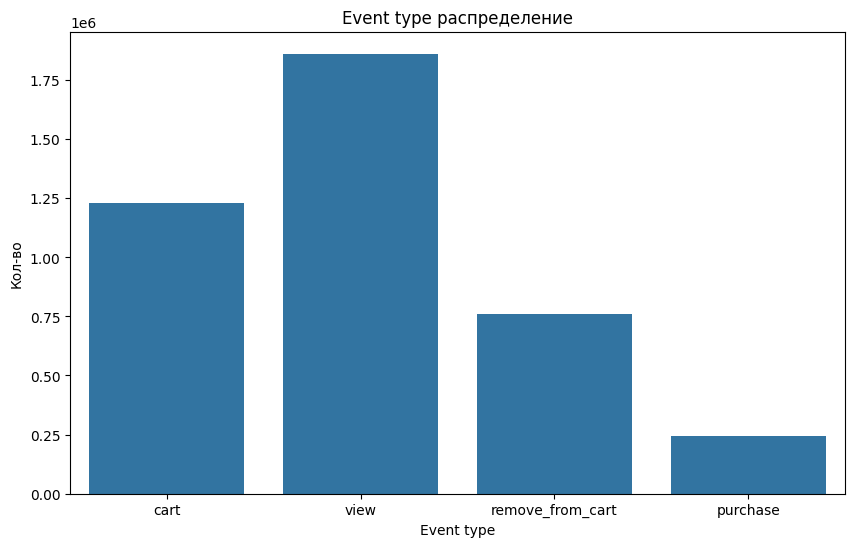

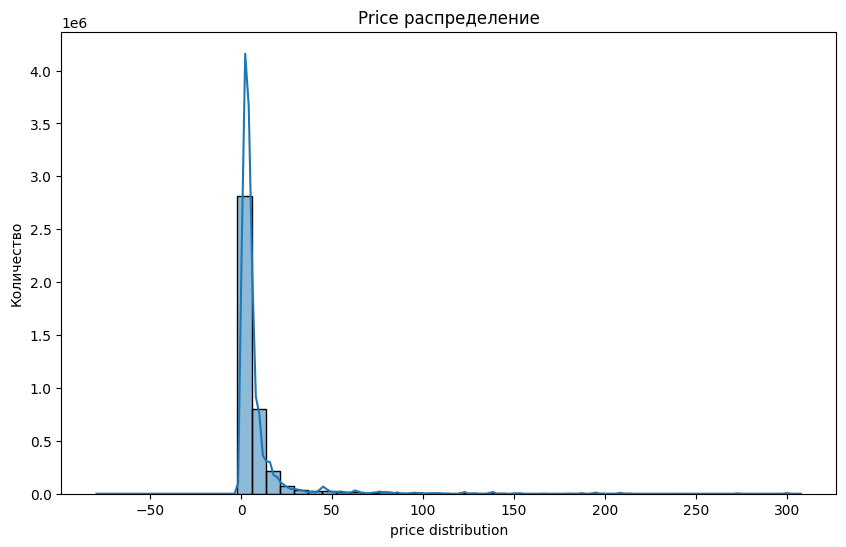

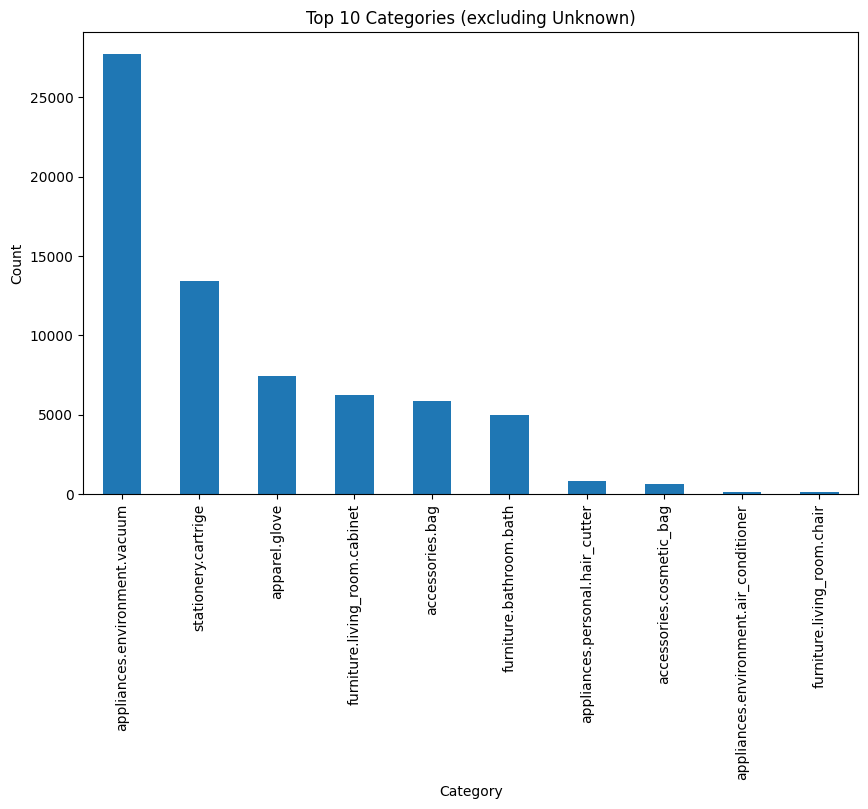

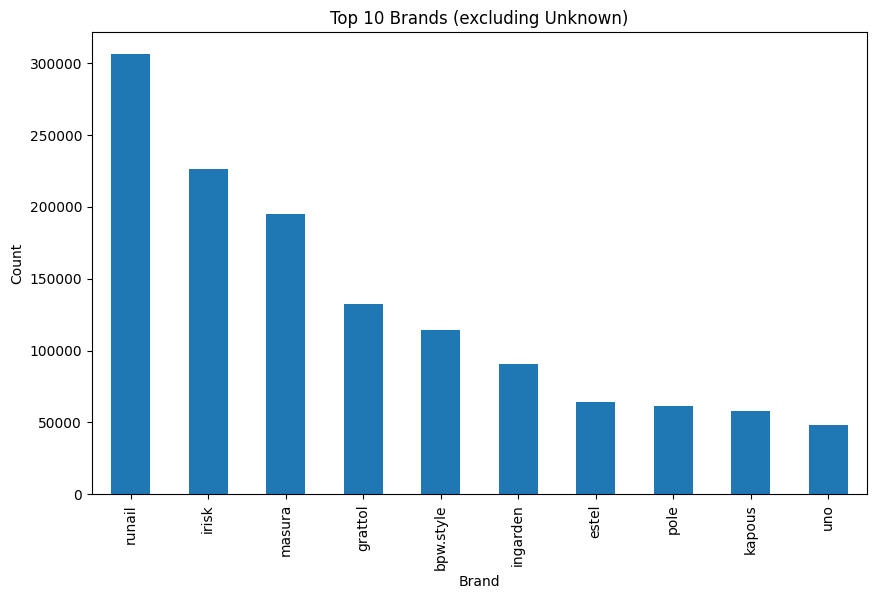

In [5]:
# event
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='event_type')
plt.title('Event type распределение')
plt.xlabel('Event type')
plt.ylabel('Кол-во')
plt.show()

#price

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='price', bins=50, kde=True)
plt.title('Price распределение')
plt.xlabel('price distribution')
plt.ylabel('Количество')
plt.show()

# category
plt.figure(figsize=(10,6))
df_filtr = df[df['category_code'] != 'unknown']
df_filtr['category_code'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Categories (excluding Unknown)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# brand
plt.figure(figsize=(10,6))
df_filtr = df[df['brand'] != 'unknown']
df_filtr['brand'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Brands (excluding Unknown)')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

In [6]:
even = {'cart' : 2,
        'view' : 1,
        'purchase' : 3}
df['step'] = df['event_type'].map(even) 

max_step = df.groupby(['user_id', 'product_id'])['step'].max().reset_index()

view_users = max_step[max_step['step'] >= 1]['user_id'].nunique()
cart_users = max_step[max_step['step'] >= 2]['user_id'].nunique()
purchase_users = max_step[max_step['step'] >= 3]['user_id'].nunique()

funnel = pd.DataFrame({
    'Stage' : ['View', 'Cart', 'Purchase'],
    'Users' : [view_users, cart_users, purchase_users]
})
funnel['CR'] = funnel['Users'] / funnel['Users'].shift(1)
funnel['CR'].iloc[0] = 1
funnel['CR'] = funnel['CR'] * 100
funnel

/var/folders/r4/7c89w02s21378007ly_nbnkw0000gn/T/ipykernel_1252/4037265992.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  funnel['CR'].iloc[0] = 1
/var/folders/r4/7c89w02s21378007ly_nbnkw0000gn/T/ipykernel_1252/4037265992.py:17: Settin

,Stage,Users,CR
0,View,399036,100.000000
1,Cart,134059,33.595716
2,Purchase,25762,19.216912


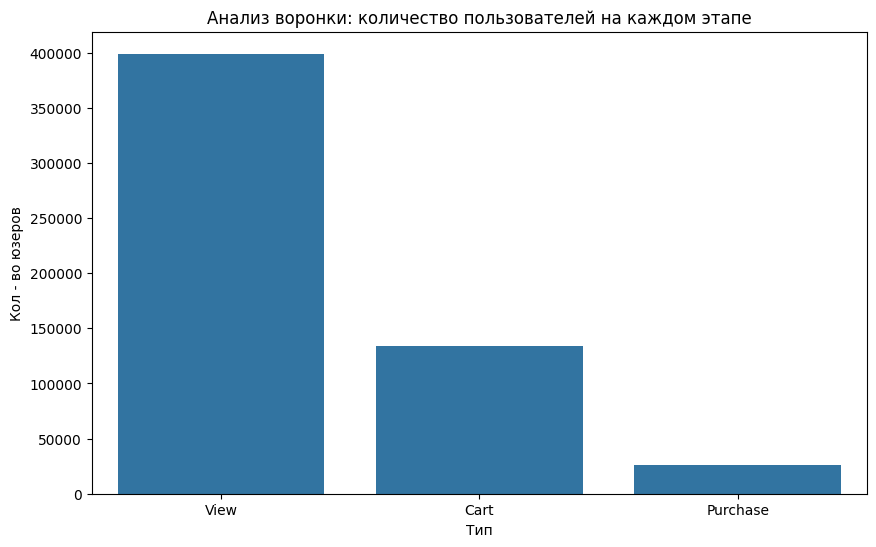

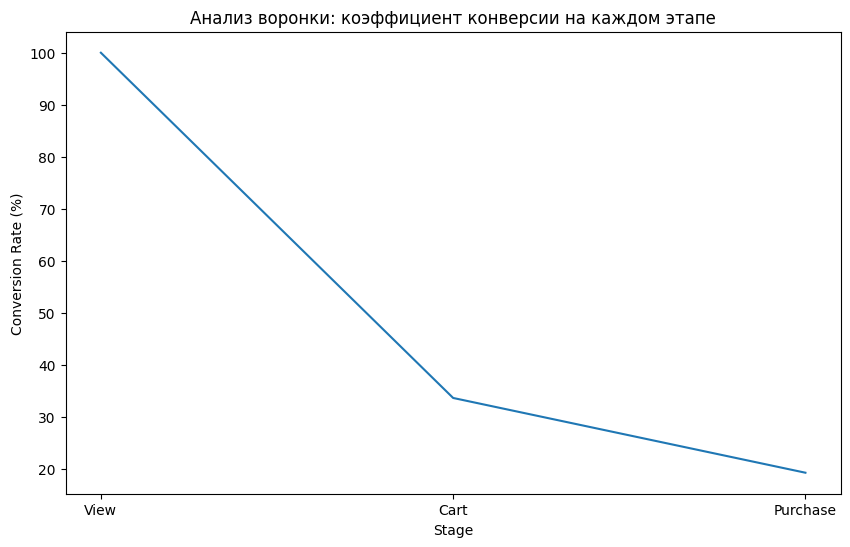

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(data=funnel, x='Stage', y='Users')
plt.title('Анализ воронки: количество пользователей на каждом этапе')
plt.xlabel('Тип')
plt.ylabel('Кол - во юзеров')

plt.figure(figsize=(10,6))
sns.lineplot(data=funnel, x='Stage', y='CR', markers='o')
plt.title('Анализ воронки: коэффициент конверсии на каждом этапе')
plt.xlabel('Stage')
plt.ylabel('Conversion Rate (%)')
plt.show()

In [19]:
category_funnel = df.groupby(['category_code', 'step'])['user_id'].nunique().unstack().fillna(0)

category_funnel.columns = ['View', 'Cart', 'Purchase']
category_funnel['Conversion from View to Cart'] = category_funnel['Cart'] / category_funnel['View'] * 100
category_funnel['Conversion from Cart to Purchase'] = category_funnel['Purchase'] / category_funnel['Cart'] * 100

category_funnel

,View,Cart,Purchase,Conversion from View to Cart,Conversion from Cart to Purchase
category_code,,,,,
accessories.bag,2457.0,157.0,37.0,6.389906,23.566879
accessories.cosmetic_bag,266.0,76.0,16.0,28.571429,21.052632
apparel.glove,1573.0,1548.0,657.0,98.410680,42.441860
appliances.environment.air_conditioner,73.0,27.0,4.0,36.986301,14.814815
appliances.environment.vacuum,6773.0,1945.0,657.0,28.716964,33.778920
appliances.personal.hair_cutter,445.0,33.0,8.0,7.415730,24.242424
furniture.bathroom.bath,1818.0,654.0,198.0,35.973597,30.275229
furniture.living_room.cabinet,3140.0,290.0,48.0,9.235669,16.551724
furniture.living_room.chair,72.0,9.0,0.0,12.500000,0.000000


In [22]:
brand_funnel = df.groupby(['brand', 'step'])['user_id'].nunique().unstack().fillna(0)

brand_funnel.columns = ['View', 'Cart', 'Purchase']
brand_funnel['Conversion from View to Cart'] = brand_funnel['Cart'] / brand_funnel['View'] * 100
brand_funnel['Conversion from Cart to Purchase'] = brand_funnel['Purchase'] / brand_funnel['Cart'] * 100

brand_funnel

,View,Cart,Purchase,Conversion from View to Cart,Conversion from Cart to Purchase
brand,,,,,
airnails,3306.0,1613.0,428.0,48.790079,26.534408
almea,553.0,144.0,27.0,26.039783,18.750000
andrea,101.0,24.0,4.0,23.762376,16.666667
ardell,1581.0,516.0,133.0,32.637571,25.775194
art-visage,3363.0,1772.0,517.0,52.691050,29.176072
...,...,...,...,...,...
ypsed,271.0,75.0,18.0,27.675277,24.000000
yu-r,185.0,36.0,7.0,19.459459,19.444444
zab,22.0,9.0,0.0,40.909091,0.000000


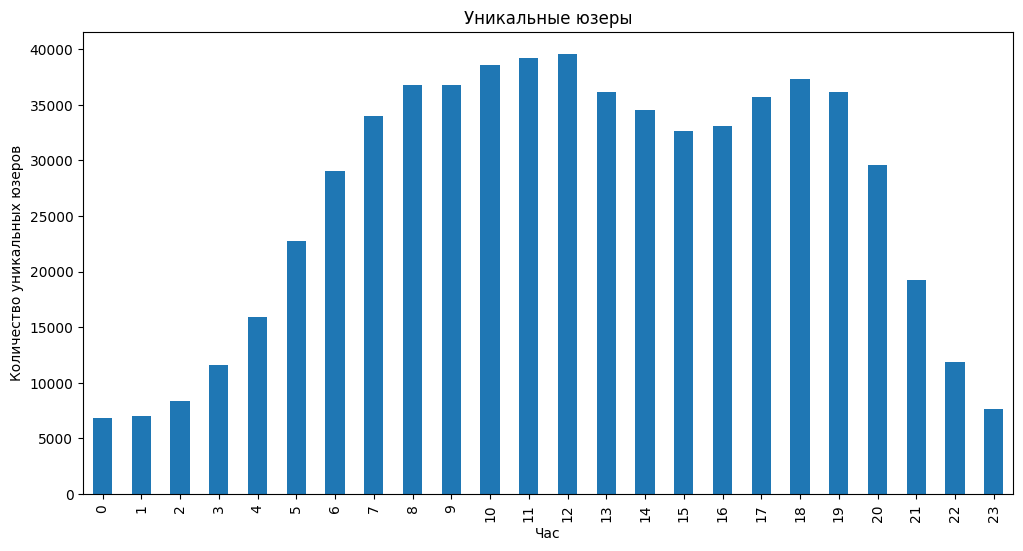

In [23]:
df['hour'] = df['event_time'].dt.hour
hourly_events = df.groupby('hour')['user_id'].nunique()

plt.figure(figsize=(12, 6))
hourly_events.plot(kind='bar')
plt.title('Уникальные юзеры')
plt.xlabel('Час')
plt.ylabel('Количество уникальных юзеров')
plt.show()


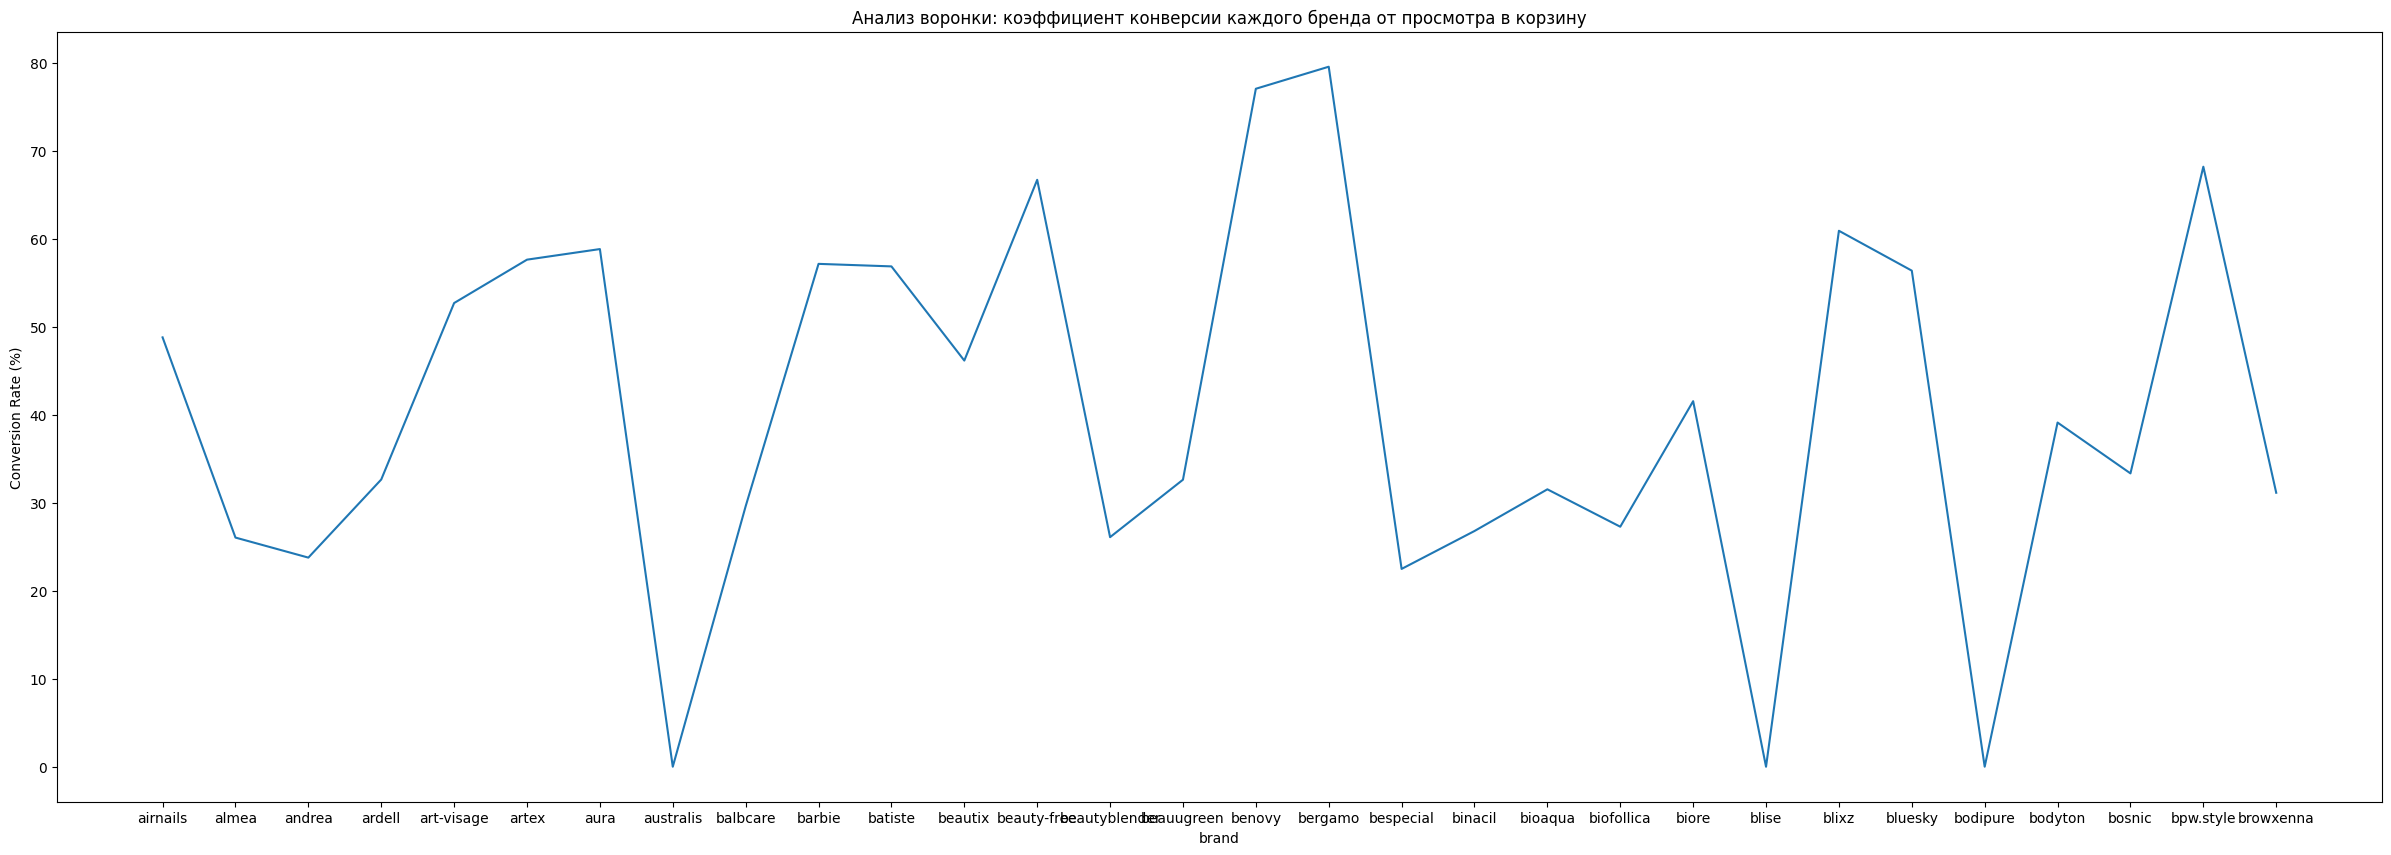

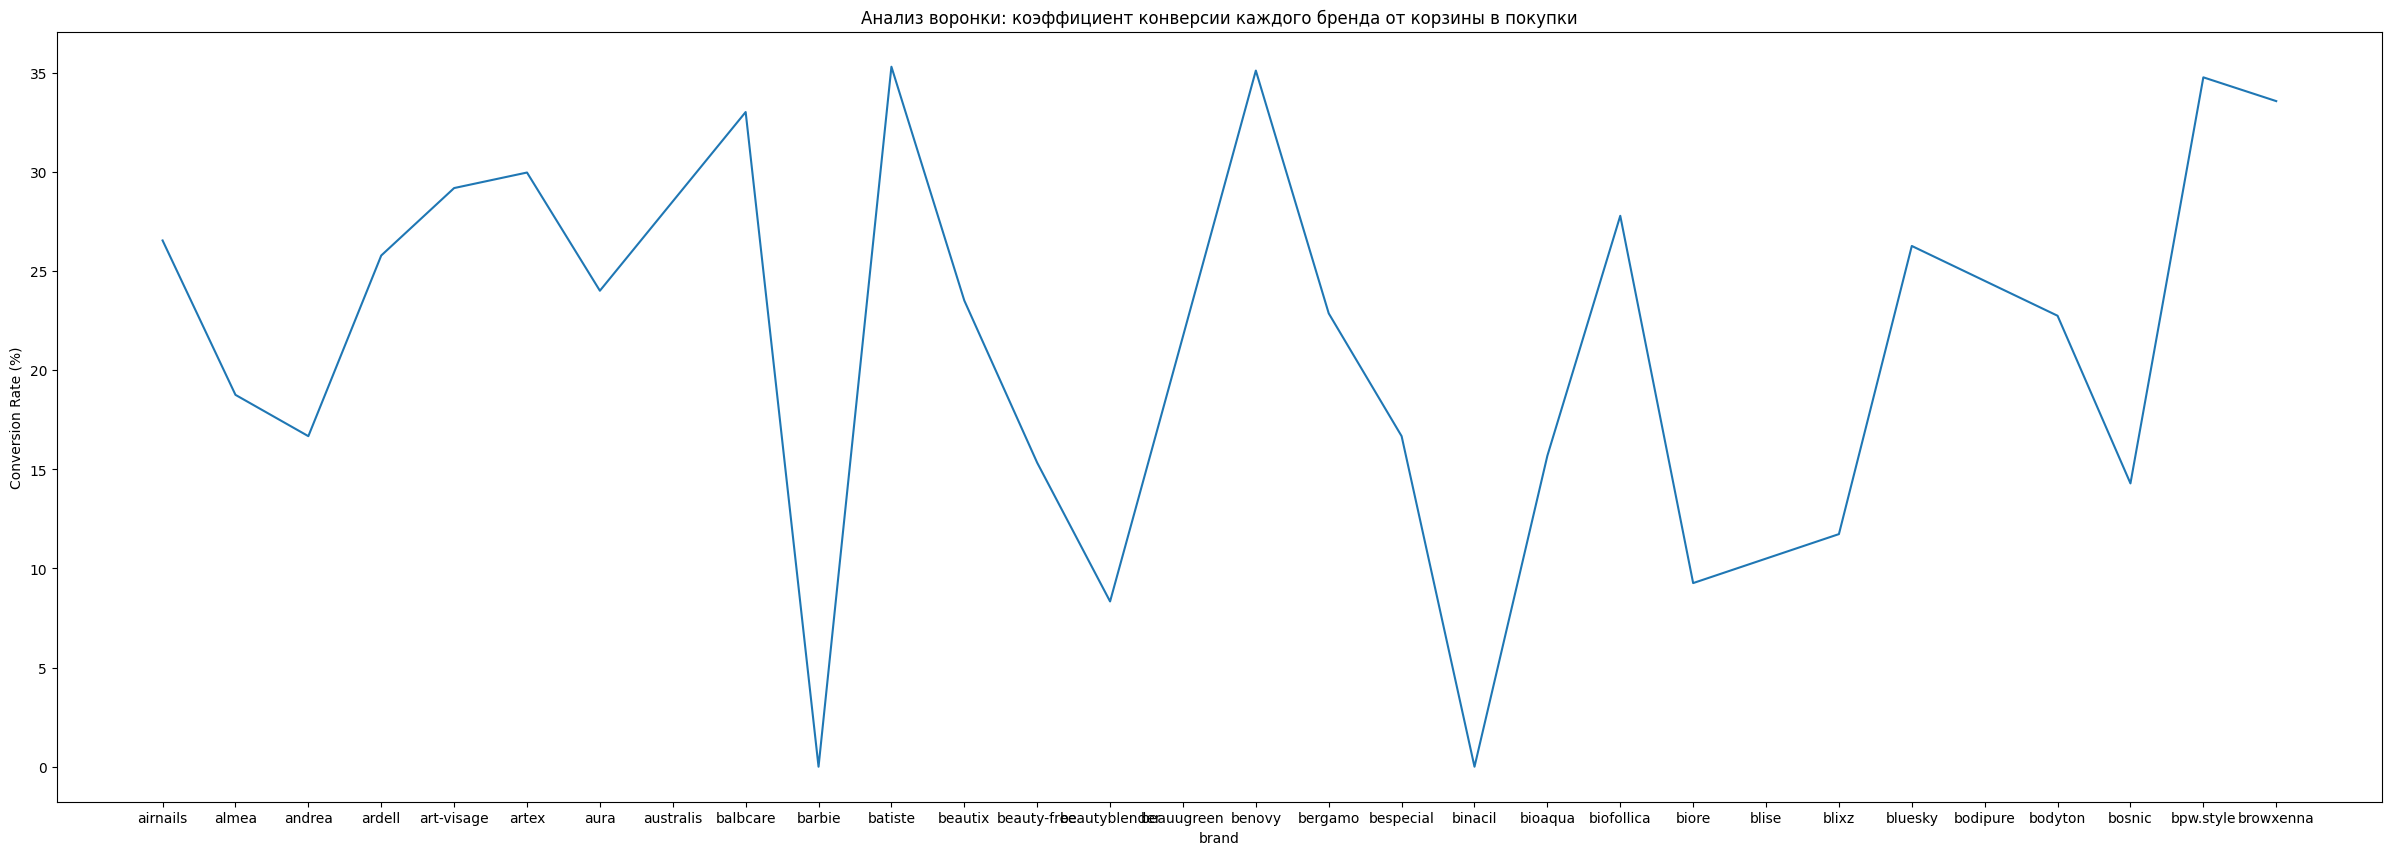

In [29]:
# Конверсия просмотров и корзины
plt.figure(figsize=(30,10))
sns.lineplot(data=brand_funnel[:30], x='brand', y='Conversion from View to Cart', markers='o')
plt.title('Анализ воронки: коэффициент конверсии каждого бренда от просмотра в корзину')
plt.xlabel('brand')
plt.ylabel('Conversion Rate (%)')
plt.show()

# Конверсия корзины и покупки
plt.figure(figsize=(30,10))
sns.lineplot(data=brand_funnel[:30], x='brand', y='Conversion from Cart to Purchase', markers='o')
plt.title('Анализ воронки: коэффициент конверсии каждого бренда от корзины в покупки')
plt.xlabel('brand')
plt.ylabel('Conversion Rate (%)')
plt.show()